In [2]:
# import libraries to work through the project 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import ttest_1samp,ttest_ind,norm,stats


In [3]:
df = pd.read_csv(r'C:\Users\amin7\OneDrive\Desktop\VS code\India.csv') # importing csv file through read csv function

# Please use loction as per your system other wise it will thorow error

In [4]:
df.head(10)

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
5,27-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
6,28-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
7,29-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
8,30-01-2020,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
9,31-01-2020,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,2.0,0.0


In [5]:
df.info() # understanding data type and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 779 non-null    object 
 1   confirmed                            771 non-null    float64
 2   vaccines                             779 non-null    float64
 3   people_vaccinated                    408 non-null    float64
 4   people_fully_vaccinated              379 non-null    float64
 5   school_closing                       773 non-null    float64
 6   workplace_closing                    769 non-null    float64
 7   cancel_events                        769 non-null    float64
 8   gatherings_restrictions              773 non-null    float64
 9   transport_closing                    769 non-null    float64
 10  stay_home_restrictions               769 non-null    float64
 11  internal_movement_restrictions  

In [6]:
df['date'] = pd.to_datetime(df['date']) # coverting object dype of date column to date time to work more efficiently 

C:\Users\amin7\AppData\Local\Temp\ipykernel_18584\2383475421.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date']) # coverting object dype of date column to date time to work more efficiently


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 779 non-null    datetime64[ns]
 1   confirmed                            771 non-null    float64       
 2   vaccines                             779 non-null    float64       
 3   people_vaccinated                    408 non-null    float64       
 4   people_fully_vaccinated              379 non-null    float64       
 5   school_closing                       773 non-null    float64       
 6   workplace_closing                    769 non-null    float64       
 7   cancel_events                        769 non-null    float64       
 8   gatherings_restrictions              773 non-null    float64       
 9   transport_closing                    769 non-null    float64       
 10  stay_home_rest

In [8]:
df.isnull().sum() # Number of Null value each column have 

date                                     0
confirmed                                8
vaccines                                 0
people_vaccinated                      371
people_fully_vaccinated                400
school_closing                           6
workplace_closing                       10
cancel_events                           10
gatherings_restrictions                  6
transport_closing                       10
stay_home_restrictions                  10
internal_movement_restrictions          10
international_movement_restrictions     10
information_campaigns                   10
contact_tracing                         10
facial_coverings                        10
dtype: int64

In [9]:
df.drop(index=df.iloc[0:8].index.tolist(),inplace=True) # Removed first 8 rows as there is no cases in these rows and no major info loss 

In [10]:
df[df['people_vaccinated'] >0 ] # checking for vaccinated people 

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
360,2021-01-16,10557985.0,0.0,191181.0,NaN,-3.0,-2.0,-2.0,-4.0,1.0,-2.0,1.0,3.0,2.0,2.0,-4.0
361,2021-01-17,10571773.0,0.0,224301.0,NaN,-3.0,-2.0,-2.0,-4.0,1.0,-2.0,1.0,3.0,2.0,2.0,-4.0
362,2021-01-18,10581823.0,0.0,454049.0,NaN,-3.0,-2.0,-2.0,-4.0,1.0,-2.0,1.0,3.0,2.0,2.0,-4.0
363,2021-01-19,10595639.0,0.0,674835.0,NaN,-3.0,-2.0,-2.0,-4.0,1.0,-2.0,1.0,3.0,2.0,2.0,-4.0
364,2021-01-20,10610883.0,0.0,806484.0,NaN,-3.0,-2.0,-2.0,-4.0,1.0,-2.0,1.0,3.0,2.0,2.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2022-03-05,42962953.0,0.0,967153861.0,800304849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,2022-03-06,42967315.0,0.0,967279389.0,801141086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,2022-03-07,42971308.0,0.0,967460932.0,802358408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,2022-03-08,42975883.0,0.0,967725805.0,804228336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['people_vaccinated'].fillna(0,inplace=True) # Assuming there is no vacines available in market till data 

In [12]:
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].replace(np.nan,0) # assuming there is no vacine and people one get first dose in recent days 

In [13]:
df.isnull().sum() # no major nan values have been remove we now remove the value by eliminating tem 

date                                    0
confirmed                               0
vaccines                                0
people_vaccinated                       0
people_fully_vaccinated                 0
school_closing                          6
workplace_closing                      10
cancel_events                          10
gatherings_restrictions                 6
transport_closing                      10
stay_home_restrictions                 10
internal_movement_restrictions         10
international_movement_restrictions    10
information_campaigns                  10
contact_tracing                        10
facial_coverings                       10
dtype: int64

In [14]:
df.dropna(inplace=True) # very few value no major impact one our research we drop them 

In [15]:
df.info() # No our data majorly cleaned and ready for eda 

# we have 761 row and 15 column to work on 

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 8 to 768
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 761 non-null    datetime64[ns]
 1   confirmed                            761 non-null    float64       
 2   vaccines                             761 non-null    float64       
 3   people_vaccinated                    761 non-null    float64       
 4   people_fully_vaccinated              761 non-null    float64       
 5   school_closing                       761 non-null    float64       
 6   workplace_closing                    761 non-null    float64       
 7   cancel_events                        761 non-null    float64       
 8   gatherings_restrictions              761 non-null    float64       
 9   transport_closing                    761 non-null    float64       
 10  stay_home_restricti

In [16]:
df[df['vaccines']>0]

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings


In [17]:

df.drop(columns='vaccines',inplace=True) # No major info available in column only zero value 

In [18]:
df.set_index('date',inplace=True) # setting Date as index to better work with data 

In [19]:
df.columns # Understanding column Data 

Index(['confirmed', 'people_vaccinated', 'people_fully_vaccinated',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'contact_tracing', 'facial_coverings'],
      dtype='object')

In [20]:
df['confirmed'].describe() # discriptive stat for the confirmed cases 

count    7.610000e+02
mean     1.663606e+07
std      1.450341e+07
min      1.000000e+00
25%      2.088611e+06
50%      1.090494e+07
75%      3.244931e+07
max      4.293104e+07
Name: confirmed, dtype: float64

<Axes: xlabel='date'>

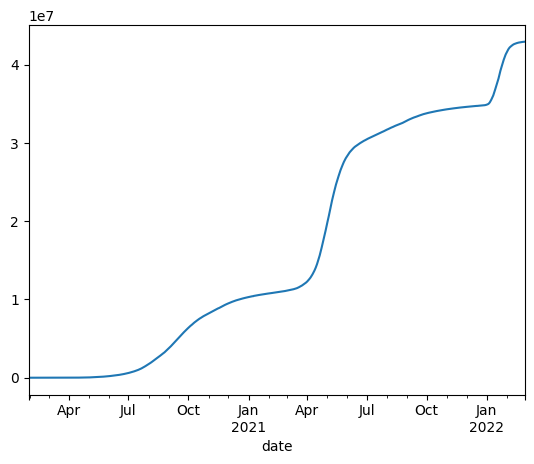

In [21]:
df['confirmed'].plot() # increase in cases day by day 

0.31783060306239386

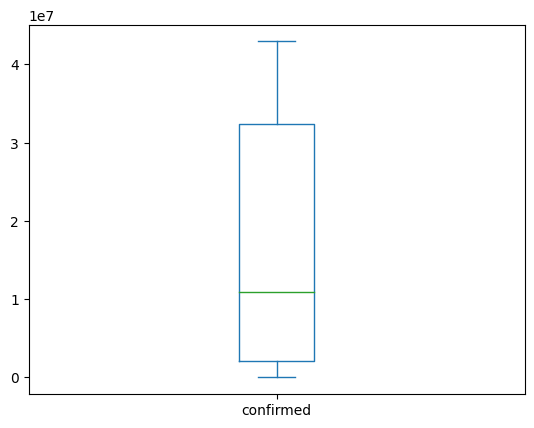

In [22]:
df['confirmed'].plot(kind='box')
df['confirmed'].skew()

In [23]:
df['confirmed'].max() # Number of cases till now 

42931045.0

-Conclusion 

-Increase in confirmed cases day by day

-cofirmed cases is almost normaly distributes 

In [24]:
df['people_vaccinated'].describe()

count    7.610000e+02
mean     2.334218e+08
std      3.313065e+08
min      0.000000e+00
25%      0.000000e+00
50%      4.138918e+06
75%      4.511869e+08
max      9.657336e+08
Name: people_vaccinated, dtype: float64

<Axes: >

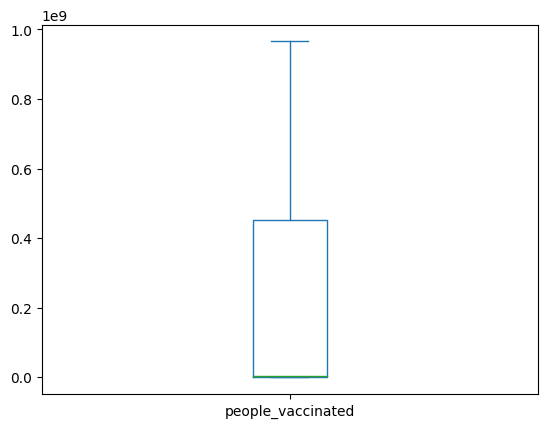

In [25]:
df['people_vaccinated'].plot(kind='box') # understanding out lier 

<Axes: ylabel='Frequency'>

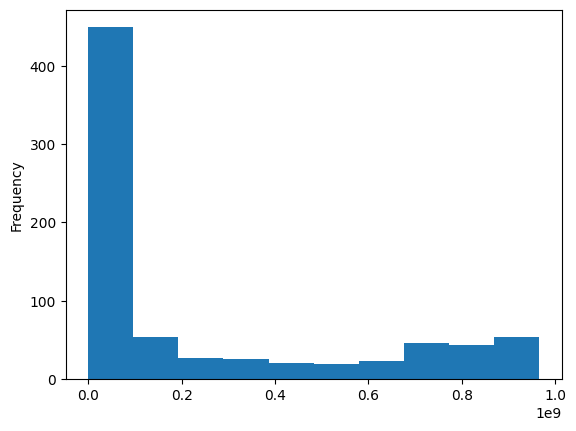

In [26]:
df['people_vaccinated'].plot(kind='hist')

<Axes: xlabel='date'>

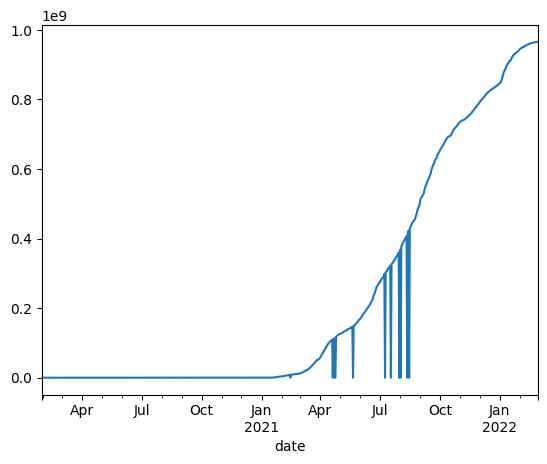

In [27]:
df['people_vaccinated'].plot() # increamnet people vacinated form near april 2021 

-Conclusion

- people vacinated column is not normaly distributed 

- vacination majorly started from April 2021


In [28]:
df['school_closing'] = df['school_closing'].replace(-3,3) # both telling same information make it same

#0 - no measures
#1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations
#2 - require closing (only some levels or categories, eg just high school, or just public schools)
# 3 - require closing all levels

school_closing
 3.0    471
-2.0    205
 0.0     48
-1.0     37
Name: count, dtype: int64

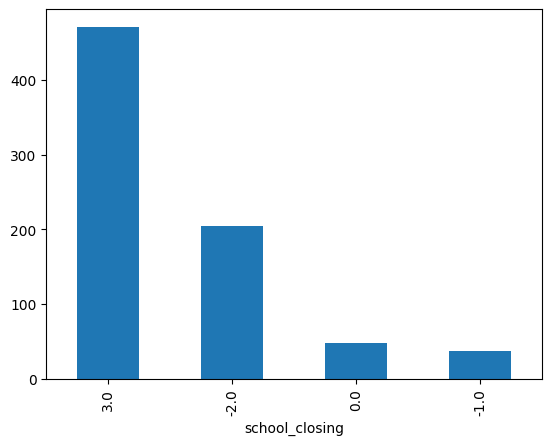

In [29]:
df['school_closing'].value_counts().plot(kind='bar')
df['school_closing'].value_counts()

-Conclusion 
    - Major recomendation for colosing of school all level during this period 

In [30]:
df['workplace_closing'] = df['workplace_closing'].replace([-1,-2,-3],[1,2,3]) # these value in minus suggesting same thing

# 0 - no measures
# 1 - recommend closing (or recommend work from home) or all businesses open with alterations resulting in significant differences compared to non-Covid-19 operation
# 2 - require closing (or work from home) for some sectors or categories of workers
# 3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors)

In [31]:
df['workplace_closing'].describe()

count    761.000000
mean       2.120894
std        0.968503
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: workplace_closing, dtype: float64

<Axes: ylabel='count'>

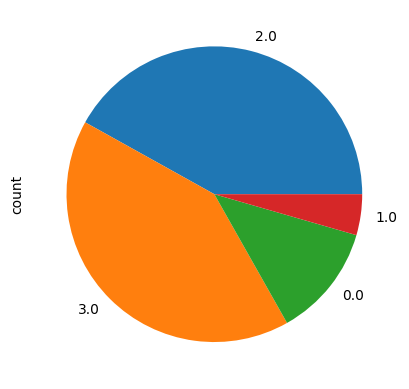

In [32]:
df['workplace_closing'].value_counts().plot(kind = 'pie')

# 3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) is the mojoe with work place closing 

-Conclusion 

    -Require closing was the most use for work place closing 

In [33]:
df['cancel_events'].describe()

count    761.000000
mean      -0.484888
std        1.826730
min       -2.000000
25%       -2.000000
50%       -2.000000
75%        2.000000
max        2.000000
Name: cancel_events, dtype: float64

In [34]:
df['cancel_events'] = df['cancel_events'].replace([-1,-2],[1,2])
#0 - no measures
#1 - recommend cancelling
#2 - require cancelling

<Axes: xlabel='cancel_events'>

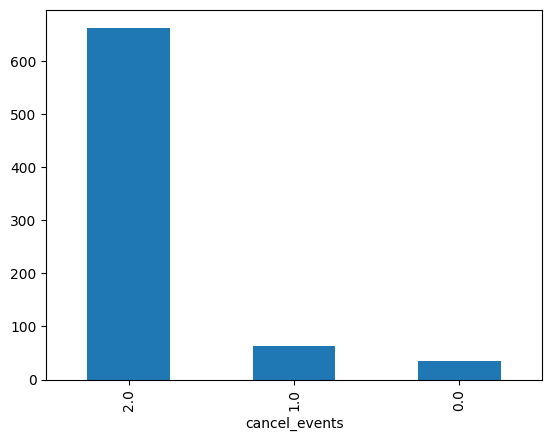

In [35]:
df['cancel_events'].value_counts().plot(kind='bar')


# Conclusion 
- Require cacelling major decision for canceling event 

In [36]:
df['gatherings_restrictions'].describe()

count    761.000000
mean      -2.812089
std        2.138042
min       -4.000000
25%       -4.000000
50%       -4.000000
75%       -2.000000
max        4.000000
Name: gatherings_restrictions, dtype: float64

In [37]:
df['gatherings_restrictions'] = df['gatherings_restrictions'].replace([-1,-2,-3,-4],[1,2,3,4])

#0 - no restrictions
#1 - restrictions on very large gatherings (the limit is above 1000 people)
#2 - restrictions on gatherings between 101-1000 people
#3 - restrictions on gatherings between 11-100 people
#4 - restrictions on gatherings of 10 people or less

<Axes: ylabel='count'>

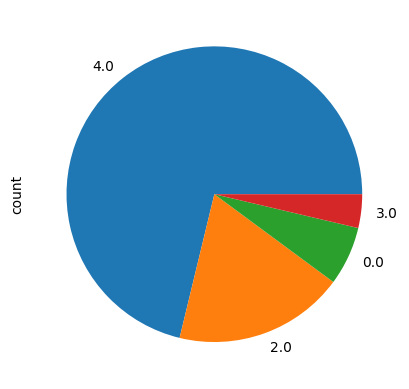

In [38]:
df['gatherings_restrictions'].value_counts().plot(kind='pie')

#4 - restrictions on gatherings of 10 people or less 

# conclusion 


--restrictions on gatherings of 10 people or less  major atempt

In [39]:
df['transport_closing'].describe()

count    761.000000
mean      -0.689882
std        1.341058
min       -2.000000
25%       -2.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: transport_closing, dtype: float64

In [40]:
df['transport_closing'] = df['transport_closing'].replace(-2,2)

# 0 - no measures
# 1 - recommend closing (or significantly reduce volume/route/means of transport available)
# 2 - require closing (or prohibit most citizens from using it)

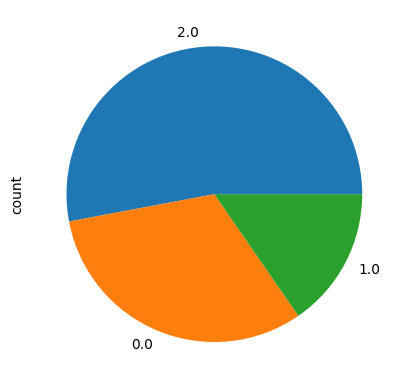

In [41]:
df['transport_closing'].value_counts().plot(kind= 'pie')
plt.show()

# Conclusion 
--Major Conclusion Require closing 

In [42]:
df['stay_home_restrictions'].describe()

count    761.000000
mean      -1.586071
std        1.689212
min       -3.000000
25%       -3.000000
50%       -2.000000
75%       -2.000000
max        3.000000
Name: stay_home_restrictions, dtype: float64

In [43]:
df['stay_home_restrictions'] = df['stay_home_restrictions'].replace([-1,-2,-3],[1,2,3])

# 0 - no measures
# 1 - recommend not leaving house
# 2 - require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips
# 3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc)

<Axes: ylabel='count'>

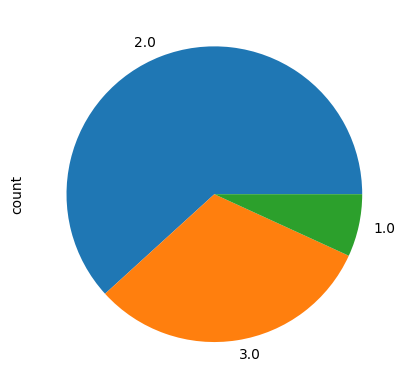

In [44]:
df['stay_home_restrictions'].value_counts()

df['stay_home_restrictions'].value_counts().plot(kind='pie')

# Conclusion 
    
    -- require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips major 

In [45]:
df['international_movement_restrictions'].describe()

count    761.000000
mean       2.988173
std        0.837362
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: international_movement_restrictions, dtype: float64

<Axes: ylabel='count'>

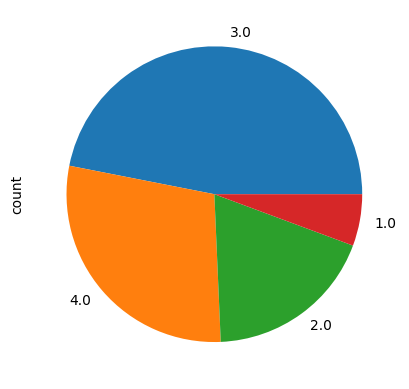

In [46]:
df['international_movement_restrictions'].value_counts()
df['international_movement_restrictions'].value_counts().plot(kind='pie')
#0 - no restrictions
#1 - screening arrivals
#2 - quarantine arrivals from some or all regions
#3 - ban arrivals from some regions
#4 - ban on all regions or total border closure

# Conclusion 
--ban arrivals from some regions majorly done 

In [47]:
df['internal_movement_restrictions'] = df['internal_movement_restrictions'].replace(-2,2)

<Axes: xlabel='internal_movement_restrictions'>

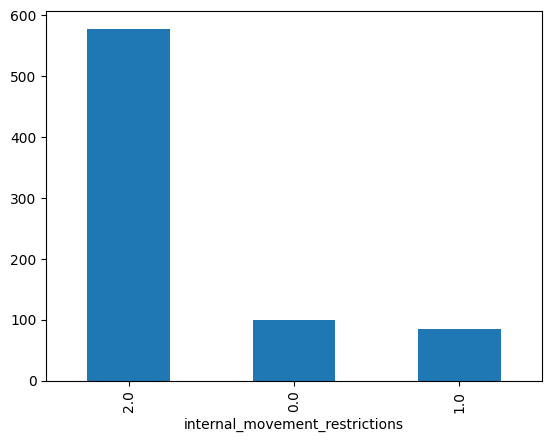

In [48]:
df['internal_movement_restrictions'].value_counts().plot(kind='bar')
#0 - no measures
#1 - recommend not to travel between regions/cities
#2 - internal movement restrictions in place

<Axes: ylabel='count'>

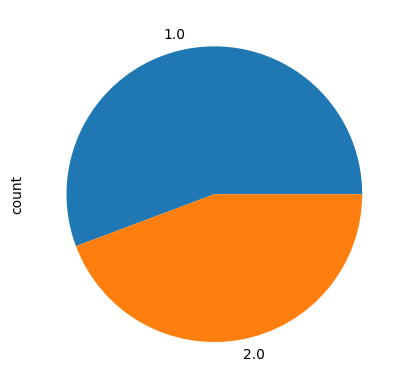

In [49]:
df['contact_tracing'].value_counts()
df['contact_tracing'].value_counts().plot(kind='pie')

#0 - no contact tracing
#1 - limited contact tracing; not done for all cases
#2 - comprehensive contact tracing; done for all identified cases

In [50]:
df['facial_coverings'] = df['facial_coverings'].replace(-4,4)

#0 - No policy
#1 - Recommended
#2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible
#3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible
#4 - Required outside the home at all times regardless of location or presence of other people

<Axes: ylabel='count'>

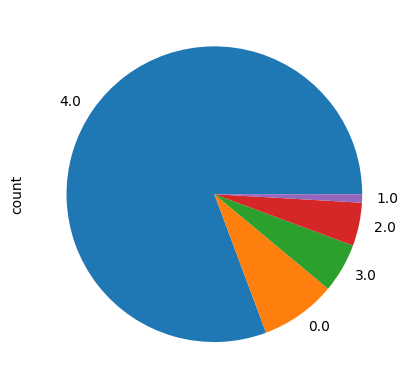

In [51]:
df['facial_coverings'].value_counts().plot(kind='pie')

In [52]:
df.columns

Index(['confirmed', 'people_vaccinated', 'people_fully_vaccinated',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'contact_tracing', 'facial_coverings'],
      dtype='object')

In [53]:
pd.crosstab(df['workplace_closing'],df['school_closing']) # understanding relationship 

school_closing,-2.0,-1.0,0.0,3.0
workplace_closing,,,,
0.0,45,0,41,8
1.0,22,0,7,5
2.0,117,37,0,165
3.0,21,0,0,293


<Axes: xlabel='confirmed', ylabel='people_vaccinated'>

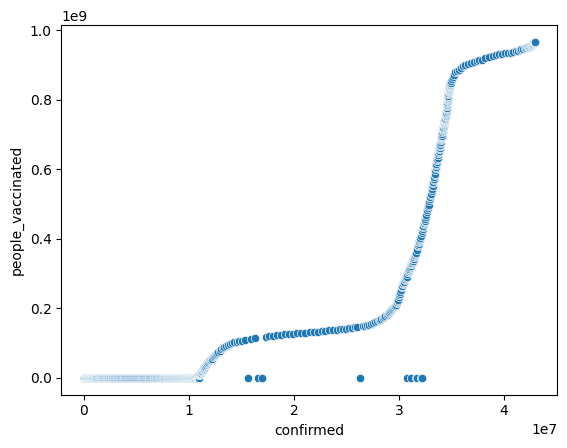

In [54]:
# understanding Relation Between confirmed cases and vacinated 

sns.scatterplot(x='confirmed',y='people_vaccinated', data=df)



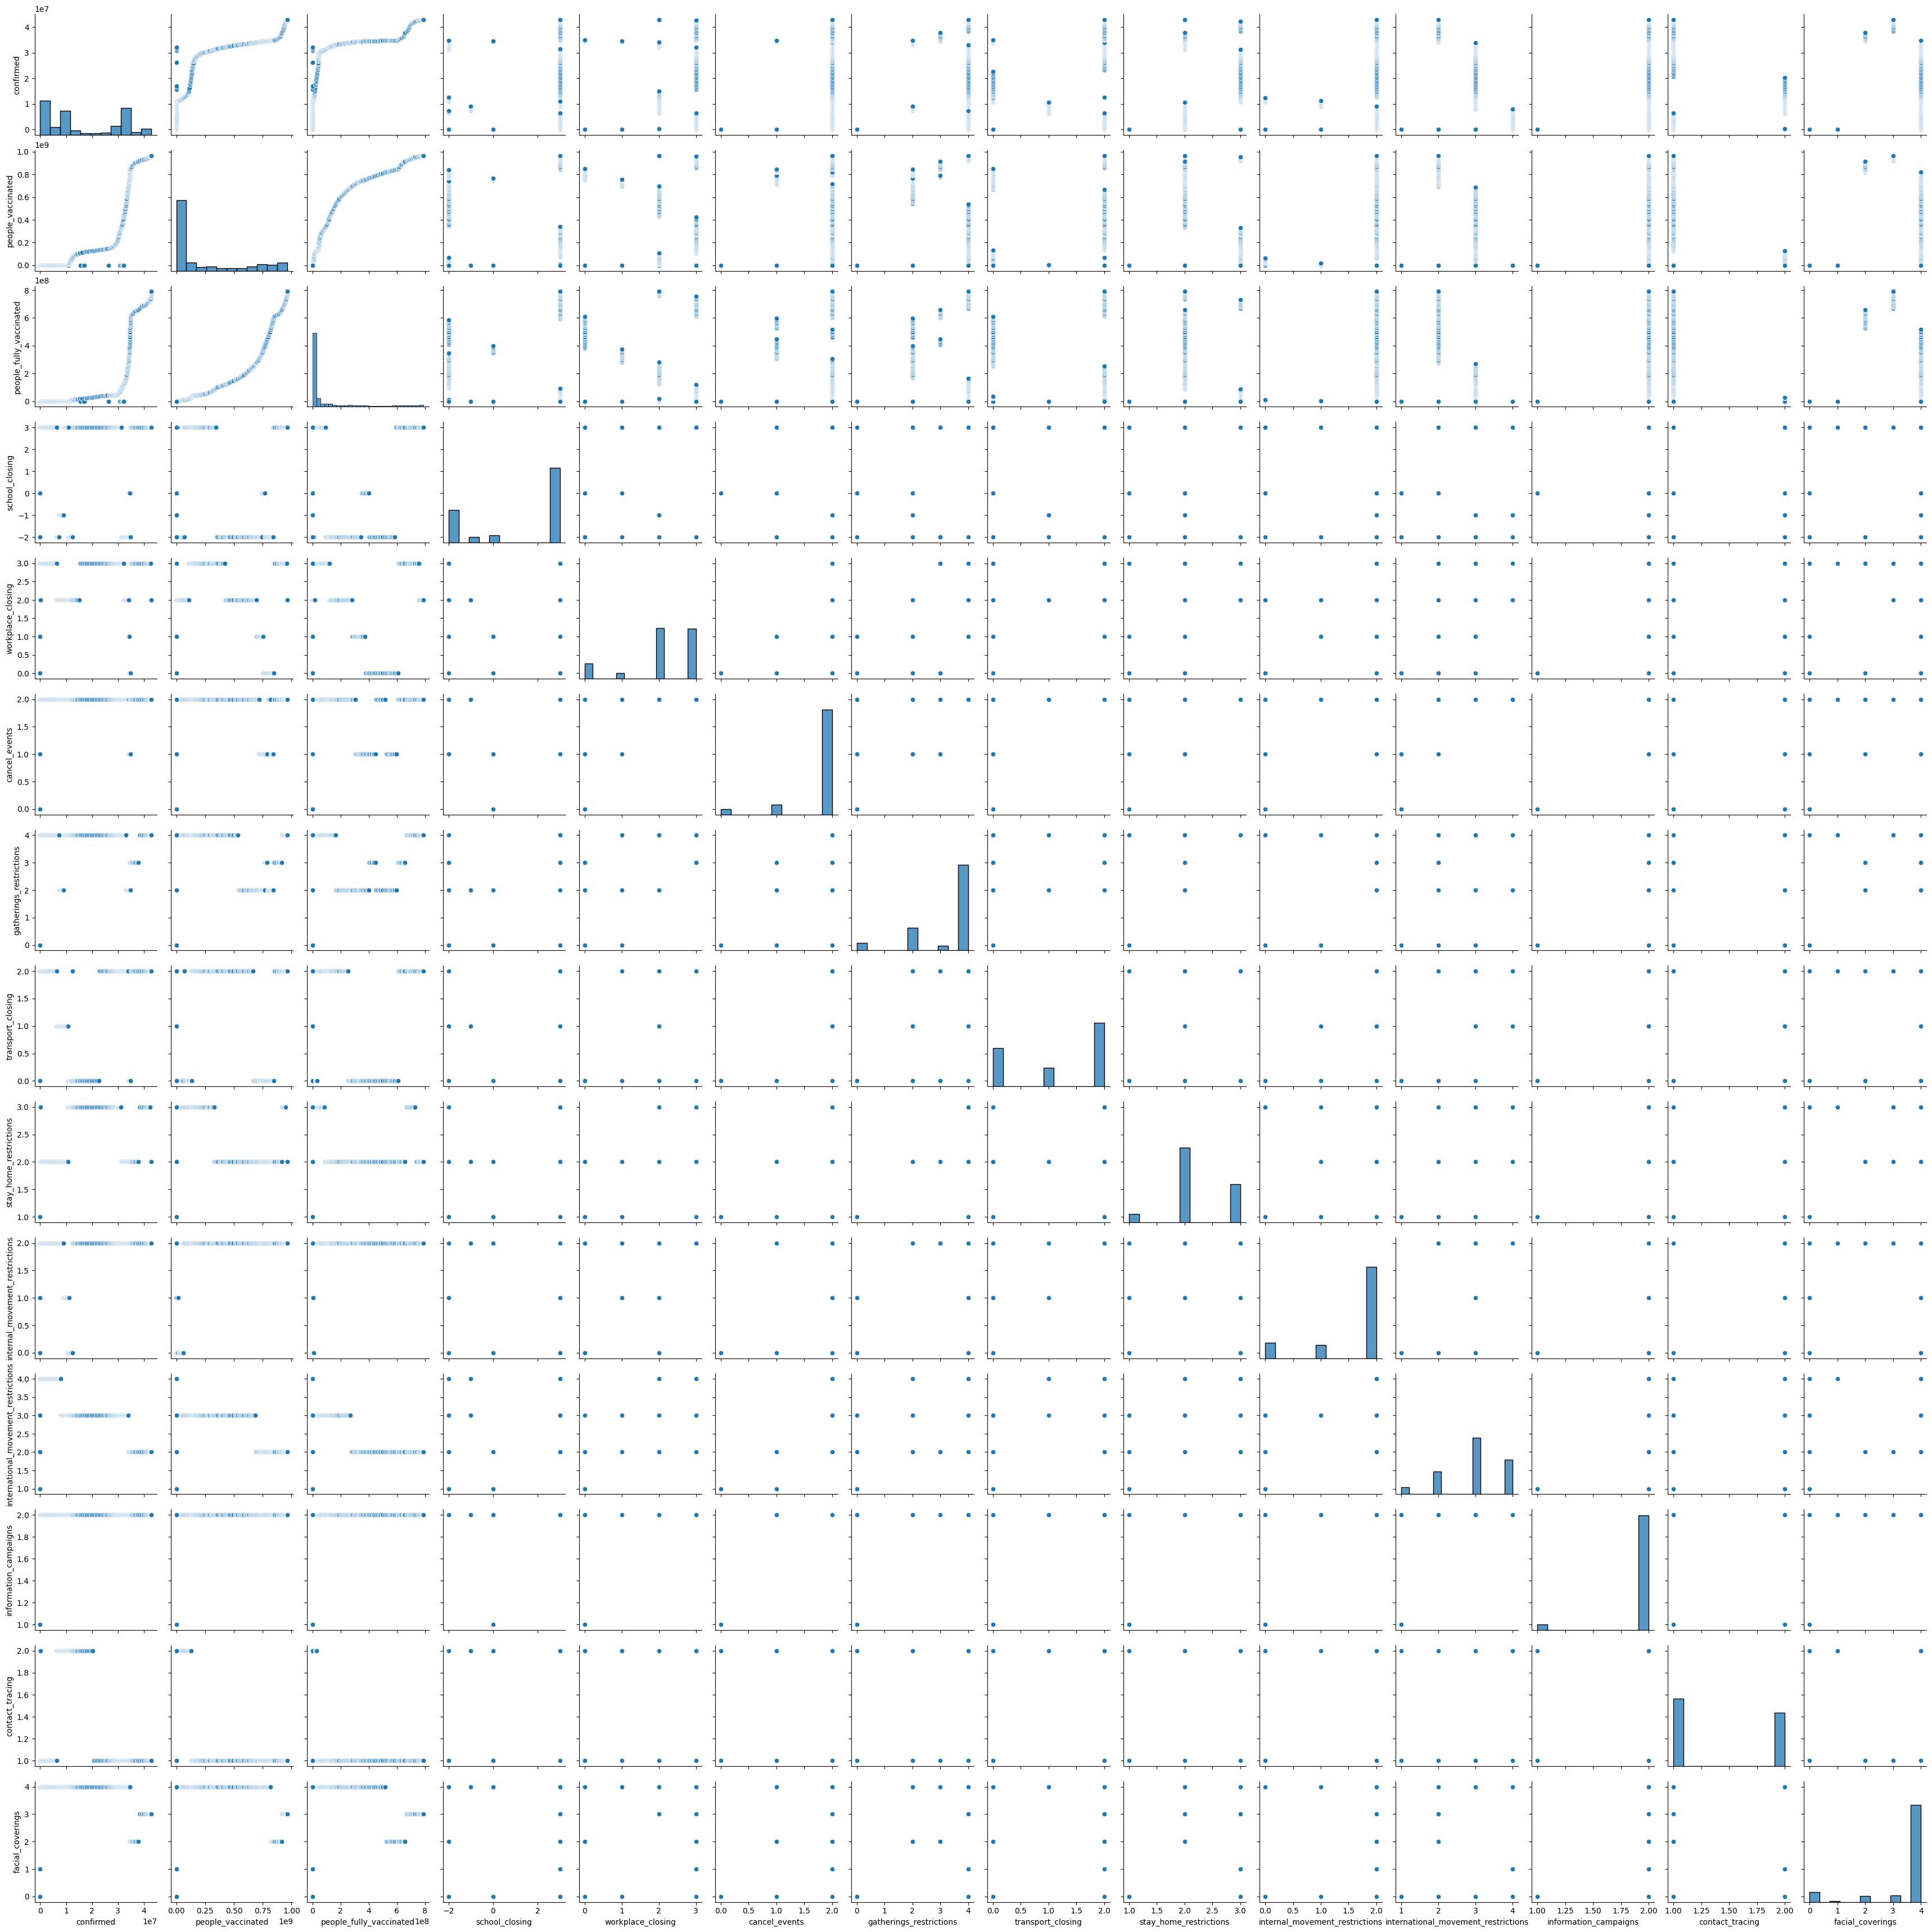

In [55]:
sns.pairplot(df) # Understanding Corelation Between variable 

In [56]:
df.corr() # give us corelation between variable

,confirmed,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,1.000000,0.889397,0.772672,-0.300169,-0.055072,0.064943,-0.025883,0.008750,0.182802,0.345703,-0.491238,0.252018,-0.602793,0.165948
people_vaccinated,0.889397,1.000000,0.944735,-0.302848,-0.225653,-0.089230,-0.191930,-0.027619,-0.034060,0.357781,-0.546155,0.154797,-0.594842,-0.035842
people_fully_vaccinated,0.772672,0.944735,1.000000,-0.144188,-0.204872,-0.086845,-0.142803,-0.013104,-0.045559,0.293887,-0.538905,0.123818,-0.493976,-0.134288
school_closing,-0.300169,-0.302848,-0.144188,1.000000,0.530557,0.304337,0.508147,0.416304,0.275853,0.097031,0.362405,0.123597,0.027238,0.030600
workplace_closing,-0.055072,-0.225653,-0.204872,0.530557,1.000000,0.726535,0.756219,0.716679,0.515345,0.429260,0.665349,0.481138,-0.248023,0.444766
cancel_events,0.064943,-0.089230,-0.086845,0.304337,0.726535,1.000000,0.754159,0.487344,0.532128,0.418449,0.676661,0.824583,-0.098535,0.647203
gatherings_restrictions,-0.025883,-0.191930,-0.142803,0.508147,0.756219,0.754159,1.000000,0.499855,0.635254,0.306715,0.660596,0.625634,-0.092828,0.601928
transport_closing,0.008750,-0.027619,-0.013104,0.416304,0.716679,0.487344,0.499855,1.000000,0.111759,0.576981,0.542036,0.297566,-0.418981,0.219152
stay_home_restrictions,0.182802,-0.034060,-0.045559,0.275853,0.515345,0.532128,0.635254,0.111759,1.000000,0.149322,0.313288,0.482009,0.033516,0.427404
internal_movement_restrictions,0.345703,0.357781,0.293887,0.097031,0.429260,0.418449,0.306715,0.576981,0.149322,1.000000,0.385992,0.509319,-0.584192,0.381898


Null Hypothesis : There is no significant relationship between confirmed cases and people vacinated 

Alternate HYpothesis : There is  significant relationship between confirmed cases and people vacinated

In [57]:
stats.pearsonr(df['confirmed'],df['people_vaccinated'])

C:\Users\amin7\AppData\Local\Temp\ipykernel_18584\2119317049.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.pearsonr(df['confirmed'],df['people_vaccinated'])


PearsonRResult(statistic=0.8893965887543416, pvalue=3.070511287544032e-260)

# Conclusin 

-- As p value is less than 0.05
 -- Accept alternate hypothesis the is significant relationship between confirmed cases and people vacinated 

Null Hypothesis : There is no significant relationship between  confirmed cases and school closing

Alternate HYpothesis : There is  significant relationship between confirmed cases and school closing 

In [58]:
school_closed =df['school_closing'] >0  #  3 - require no closing

In [59]:
ttest_ind(df['confirmed'],school_closed)

Ttest_indResult(statistic=31.64262330172439, pvalue=3.0433412706099393e-169)

# Conclusion 
    --As p value is less then .005 we reject null hypothesis there is significant relationship between confirmed cases and school clossing

Null Hypothesis: There is no significant relationship between workplace closing measures and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between workplace closing measures and the number of daily cases.

In [60]:
Workplace_closing = df['workplace_closing']>0 # 0 - no measures
#1 - recommend closing (or recommend work from home) or all businesses open with alterations resulting in significant differences compared to non-Covid-19 operation
#2 - require closing (or work from home) for some sectors or categories of workers
#3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors)

In [61]:
ttest_ind(df['confirmed'],Workplace_closing)

Ttest_indResult(statistic=31.642622811840056, pvalue=3.043369739959077e-169)

P-Value is less the .05 

---Reject the null hypothes there is significant relation between the confirmed cases and workplace clossing 

Null Hypothesis: There is no significant relationship between gathering restrictions and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between gathering restrictions and the number of daily cases.

In [62]:
gathering = df['gatherings_restrictions'] > 0  # 	0 - no restrictions

In [63]:
ttest_ind(df['confirmed'],gathering)

Ttest_indResult(statistic=31.64262269936662, pvalue=3.0433762763260525e-169)

# P-value Is less than .05

--Reject the null hypothesis there is relationship between gathering and number of daily cases 

Null Hypothesis: There is no significant relationship between transport closing measures and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between transport closing measures and the number of daily cases.

In [64]:
transport_closing = df['transport_closing'] >0  #0 - no measures
#1 - recommend closing (or significantly reduce volume/route/means of transport available)
#2 - require closing (or prohibit most citizens from using it)'''

In [65]:
ttest_ind(df['confirmed'],transport_closing)

Ttest_indResult(statistic=31.642623179253306, pvalue=3.0433483879223425e-169)

As MY p-value is less than 0.05

-- reject null hypothesis there is relationship between closing measure and number of daily cases 

Null Hypothesis: There is no significant relationship between stay-at-home restrictions and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between stay-at-home restrictions and the number of daily cases.

0 - no measures

1 - recommend not leaving house

2 - require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips

3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc)

In [66]:
sthome = df['stay_home_restrictions'] > 0

In [67]:
ttest_ind(df['confirmed'],transport_closing)

Ttest_indResult(statistic=31.642623179253306, pvalue=3.0433483879223425e-169)

p-value less then .05
 We can reject the null hypothes and accept the alternative hypothesis

Null Hypothesis: There is no significant relationship between internal_movement_restrictions and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between internal_movement_restrictions and the number of daily cases.

0 - no measures

1 - recommend not to travel between regions/cities

2 - internal movement restrictions in place

In [68]:
it_mov = df['internal_movement_restrictions'] >0

In [69]:
ttest_ind(df['confirmed'],it_mov)

Ttest_indResult(statistic=31.642622824337106, pvalue=3.0433690136967346e-169)

p-value less then .05
 We can reject the null hypothes and accept the alternative hypothesis

Null Hypothesis: There is no significant relationship between international_movement_restrictions and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between international_movement_restrictions and the number of daily cases.

0 - no restrictions

1 - screening arrivals

2 - quarantine arrivals from some or all regions

3 - ban arrivals from some regions

4 - ban on all regions or total border closure

In [70]:
int_mov = df['international_movement_restrictions'] > 0 

In [71]:
ttest_ind(df['confirmed'],int_mov)

C:\Users\amin7\AppData\Local\Temp\ipykernel_18584\436540637.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest_ind(df['confirmed'],int_mov)


Ttest_indResult(statistic=31.642622576895537, pvalue=3.043383393719976e-169)

p-value less then .05
 We can reject the null hypothes and accept the alternative hypothesis

Null Hypothesis: There is no significant relationship between facial_coverings and the number of daily cases.

Alternate Hypothesis: There is a significant relationship between facial_coverings and the number of daily cases.

0 - No policy

1 - Recommended

2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible

3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible

4 - Required outside the home at all times regardless of location or presence of other people

In [72]:
facial = df['facial_coverings'] > 0

In [73]:
ttest_ind(df['confirmed'],facial)

Ttest_indResult(statistic=31.642622734358355, pvalue=3.0433742427881856e-169)

As p-value is than .05 we reject the null hypothes which mean there is relationship  between facial covering and daily cases 